In [1]:
import pandas as pd

In [5]:
diabetes = pd.read_csv('C:/Users/admin/Desktop/FULL-TENSORFLOW-NOTES-AND-DATA/Tensorflow-Bootcamp-master/02-TensorFlow-Basics/pima-indians-diabetes.csv')

In [6]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [7]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [8]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [9]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [10]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [11]:
import tensorflow as tf

In [12]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [13]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [14]:
assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

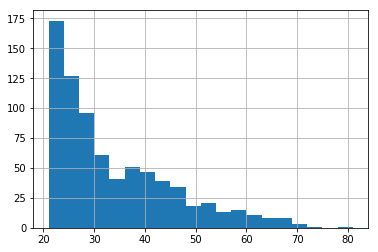

In [16]:
diabetes['Age'].hist(bins=20)

In [19]:
age_buckets = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [20]:
feat_cols =  [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

In [21]:
x_data = diabetes.drop('Class',axis=1)

In [22]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [23]:
labels = diabetes['Class']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x_data,labels,test_size=0.3,random_state=101)

In [26]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [27]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_session_config': None, '_model_dir': 'C:\\Users\\admin\\AppData\\Local\\Temp\\tmpiim0xqe_', '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_save_checkpoints_steps': None}


In [28]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\admin\AppData\Local\Temp\tmpiim0xqe_\model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 313.35
INFO:tensorflow:loss = 6.36131, step = 101 (0.308 sec)
INFO:tensorflow:global_step/sec: 404.57
INFO:tensorflow:loss = 5.63126, step = 201 (0.247 sec)
INFO:tensorflow:global_step/sec: 399.717
INFO:tensorflow:loss = 5.07151, step = 301 (0.252 sec)
INFO:tensorflow:global_step/sec: 393.421
INFO:tensorflow:loss = 8.68628, step = 401 (0.253 sec)
INFO:tensorflow:global_step/sec: 391.88
INFO:tensorflow:loss = 6.34617, step = 501 (0.254 sec)
INFO:tensorflow:global_step/sec: 396.542
INFO:tensorflow:loss = 5.88952, step = 601 (0.253 sec)
INFO:tensorflow:global_step/sec: 396.545
INFO:tensorflow:loss = 6.30217, step = 701 (0.251 sec)
INFO:tensorflow:global_step/sec: 419.87
INFO:tensorflow:loss = 5.5616, step = 801 (0.240 sec)
INFO:tensorflow:global_step/sec: 377.089
INFO:te

In [29]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [30]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-07-08-07:36:28
INFO:tensorflow:Restoring parameters from C:\Users\admin\AppData\Local\Temp\tmpiim0xqe_\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-07-08-07:36:29
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.744589, accuracy_baseline = 0.649351, auc = 0.79786, auc_precision_recall = 0.638519, average_loss = 0.529167, global_step = 1000, label/mean = 0.350649, loss = 5.09323, prediction/mean = 0.3639


In [31]:
results

{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79786003,
 'auc_precision_recall': 0.63851941,
 'average_loss': 0.52916712,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0932336,
 'prediction/mean': 0.36390048}

In [32]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,batch_size=10,num_epochs=1,shuffle=False)

In [33]:
predictions = model.predict(pred_input_func)

In [34]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\admin\AppData\Local\Temp\tmpiim0xqe_\model.ckpt-1000


In [35]:
my_pred

[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.53033429], dtype=float32),
  'logits': array([ 0.12148637], dtype=float32),
  'probabilities': array([ 0.46966571,  0.53033429], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.61652654], dtype=float32),
  'logits': array([ 0.47483093], dtype=float32),
  'probabilities': array([ 0.38347349,  0.61652654], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.38130549], dtype=float32),
  'logits': array([-0.48401067], dtype=float32),
  'probabilities': array([ 0.61869448,  0.38130555], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.33330086], dtype=float32),
  'logits': array([-0.69329327], dtype=float32),
  'probabilities': array([ 0.66669917,  0.33330089], dtype=flo

In [36]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_session_config': None, '_model_dir': 'C:\\Users\\admin\\AppData\\Local\\Temp\\tmp107b5uhe', '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_save_checkpoints_steps': None}


In [38]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [40]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_col, age_buckets]

In [41]:
input_func = tf.estimator.inputs.pandas_input_fn(x_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [42]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_session_config': None, '_model_dir': 'C:\\Users\\admin\\AppData\\Local\\Temp\\tmp9aaepwsf', '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_save_checkpoints_steps': None}


In [43]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\admin\AppData\Local\Temp\tmp9aaepwsf\model.ckpt.
INFO:tensorflow:loss = 7.10255, step = 1
INFO:tensorflow:global_step/sec: 319.143
INFO:tensorflow:loss = 5.80825, step = 101 (0.314 sec)
INFO:tensorflow:global_step/sec: 388.378
INFO:tensorflow:loss = 4.15861, step = 201 (0.259 sec)
INFO:tensorflow:global_step/sec: 391.879
INFO:tensorflow:loss = 5.82585, step = 301 (0.255 sec)
INFO:tensorflow:global_step/sec: 384.342
INFO:tensorflow:loss = 3.58233, step = 401 (0.259 sec)
INFO:tensorflow:global_step/sec: 398.123
INFO:tensorflow:loss = 4.22637, step = 501 (0.252 sec)
INFO:tensorflow:global_step/sec: 390.349
INFO:tensorflow:loss = 6.94171, step = 601 (0.256 sec)
INFO:tensorflow:global_step/sec: 372.869
INFO:tensorflow:loss = 6.79342, step = 701 (0.270 sec)
INFO:tensorflow:global_step/sec: 375.672
INFO:tensorflow:loss = 4.80264, step = 801 (0.269 sec)
INFO:tensorflow:global_step/sec: 371.484
IN

In [44]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [45]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-07-08-07:52:06
INFO:tensorflow:Restoring parameters from C:\Users\admin\AppData\Local\Temp\tmp9aaepwsf\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-07-08-07:52:07
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.779221, accuracy_baseline = 0.649351, auc = 0.843868, auc_precision_recall = 0.725231, average_loss = 0.464233, global_step = 1000, label/mean = 0.350649, loss = 4.46824, prediction/mean = 0.34825


{'accuracy': 0.77922076,
 'accuracy_baseline': 0.64935064,
 'auc': 0.84386826,
 'auc_precision_recall': 0.72523129,
 'average_loss': 0.4642328,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.4682407,
 'prediction/mean': 0.34824961}